# Simple Moving Average Crossover Trading Strategy

> #### This program will calculate short and long simple moving averages of a security via the Yahoo Finance API to determine buy or sell signals. The program will plot the moving averages and create markers indicating each crossover for easy analysis of stock price movement

***

### Create a pandas DataFrame containing relevant stock price data

> The user will input a ticker to analyze 

In [24]:
import pandas as pd 
import pandas_datareader as pdr 
import datetime as dt
from IPython.display import display

# Create a time period to pull data from
start_date = dt.datetime(2020,1,1)
end_date = dt.datetime.now()

# Ask the user to input a ticker and convert it to upper case
ticker = input('Choose a ticker: ').upper()

# Create a DataFrame containing data about a specified stock using the specified time period
ticker_data = pdr.get_data_yahoo(ticker, start_date, end_date)
display(ticker_data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.151962
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.207581
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,154.606186
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.196503
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,155.636673
...,...,...,...,...,...,...
2022-11-11,247.990005,241.929993,242.990005,247.110001,34600900.0,246.415558
2022-11-14,243.910004,239.210007,241.990005,241.550003,31123300.0,240.871185
2022-11-15,247.000000,240.029999,245.660004,241.970001,31390100.0,241.290009


***

### Add columns to the DataFrame to display the moving averages and points of crossovers 

> Short Moving Averages will use a rolling window of 30 days 
>
> Long Moving Averages will use a rolling window of 100 days
>
> A signal to buy or sell will occur whenever a position value changes 

In [25]:
import numpy as np

# Create new columns in the DataFrame to show short and long moving averages 
ticker_data['Short SMA'] = ticker_data['Adj Close'].rolling(window=30, min_periods=1).mean()
ticker_data['Long SMA'] = ticker_data['Adj Close'].rolling(window=100, min_periods=1).mean()

# Create a position column which can represent where a crossover happens 
ticker_data['Position'] = np.where(ticker_data['Short SMA'] > ticker_data['Long SMA'], 1, 0)

# Create a signal column to determine buy(1) or sell(-1) when position changes
ticker_data['Signal'] = ticker_data['Position'].diff() 

# Replace all NaN values with 0
ticker_data.fillna(0, inplace=True)

display(ticker_data)

,High,Low,Open,Close,Volume,Adj Close,Short SMA,Long SMA,Position,Signal
Date,,,,,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.151962,156.151962,156.151962,0,0.0
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.207581,155.179771,155.179771,0,0.0
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,154.606186,154.988576,154.988576,0,0.0
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.196503,154.540558,154.540558,0,0.0
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,155.636673,154.759781,154.759781,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-11-11,247.990005,241.929993,242.990005,247.110001,34600900.0,246.415558,233.776846,254.039934,0,0.0
2022-11-14,243.910004,239.210007,241.990005,241.550003,31123300.0,240.871185,233.803770,253.872788,0,0.0
2022-11-15,247.000000,240.029999,245.660004,241.970001,31390100.0,241.290009,233.574084,253.621865,0,0.0


***

### Create a graph to compare the Adjusted Close Price, Short Moving Average, and Long Moving Average

> A green marker will be displayed when the short moving average goes above the long moving average
> 
> A red marker will be displayed when the long moving average goes above the short moving average

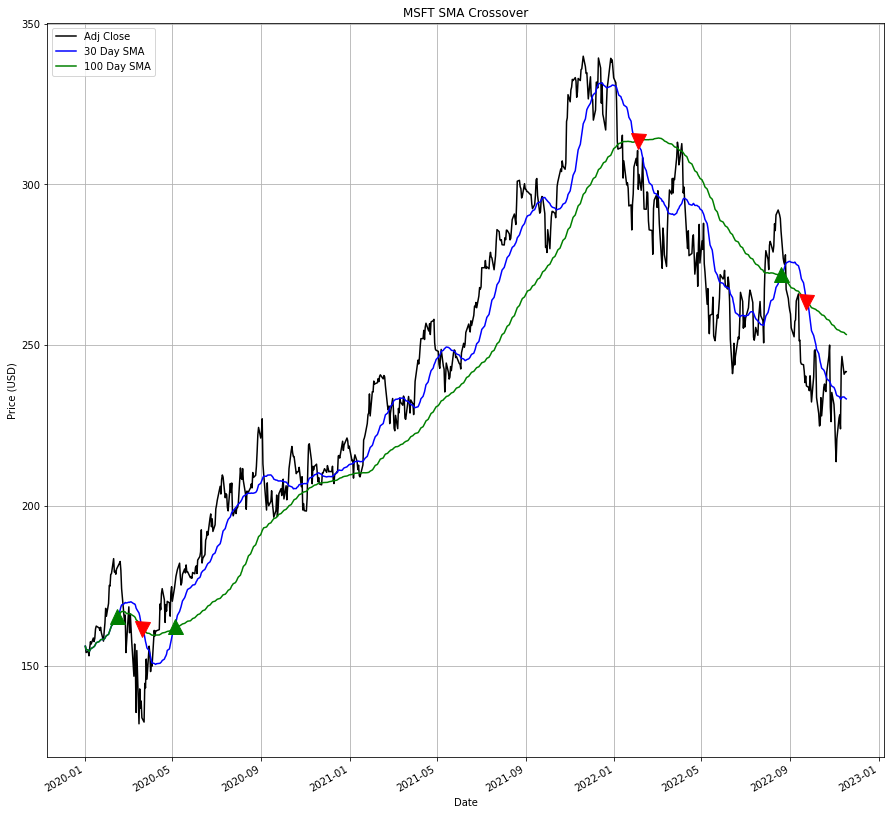

In [27]:
import matplotlib.pyplot as plt

# Plot close price, short SMA, and long SMA; Set title, y-axis label, and legend
ticker_data['Adj Close'].plot(color='k', title='{} SMA Crossover'.format(ticker), ylabel='Price (USD)', figsize=(15,15))
ticker_data['Short SMA'].plot(color='b', label='30 Day SMA')
ticker_data['Long SMA'].plot(color='g', label='100 Day SMA', grid=True).legend(loc='upper left')

# Plot 'buy' signals
plt.plot(ticker_data[ticker_data['Signal'] == 1].index, ticker_data['Short SMA'][ticker_data['Signal'] == 1], '^', markersize = 15, color = 'g', label = 'buy')

# Plot 'sell' signals 
plt.plot(ticker_data[ticker_data['Signal'] == -1].index, ticker_data['Short SMA'][ticker_data['Signal'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')